In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#change file to your local ScrapedSP500 file
sp500_file_string = "/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/ScrapedSP500.csv"
sp500 = pd.read_csv(sp500_file_string)

In [2]:
days_to_predict = 20

Convert Date column to pandas datetime object, trim data to a year of training
plus days_to_predict before 12/31/21, and make chronological

In [3]:
sp500['DateTime'] = pd.to_datetime(sp500['Date'])

end_date = pd.to_datetime('2021-12-31')
start_date = end_date - pd.offsets.DateOffset(days = days_to_predict)-pd.offsets.DateOffset(years = 1)


sp500['DateTime'] = np.where(sp500['DateTime'].dt.year > 2022, sp500['DateTime'] - pd.offsets.DateOffset(years=100), sp500['DateTime'])
# Anything after 2022 is changed to have 100 years subtracted because 2022 is the current year, change it as the years progress
sp500 = sp500.loc[(sp500['DateTime']>=start_date)&(sp500['DateTime']<=end_date)]
#sp500 = sp500.loc[::-1].reset_index(drop=True)

sp500_close = np.log(sp500['Adj Close'])

dates = sp500['DateTime']



Pull in other data sets, do same transformation

In [4]:
#change the below files to your local drive
unemp = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/UNRATE.csv")
ten_year_rate = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/DGS10.csv")
rec_exp = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/Rec-Exp.csv")
cpi = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/CPIAUCSL.csv")
vix = pd.read_csv("/Users/douglasallen/Library/CloudStorage/GoogleDrive-deallen1989@gmail.com/My Drive/Northeastern/Machine Learning/Final/Raw Data/VIX_History.csv")

unemp['DateTime'] = pd.to_datetime(unemp['DATE'])
ten_year_rate['DateTime'] = pd.to_datetime(ten_year_rate['DATE'])
ten_year_rate['ten_year'] = ten_year_rate['ten_year'].astype(float)
rec_exp['DateTime'] = pd.to_datetime(rec_exp['DATE'])
cpi['DateTime'] = pd.to_datetime(cpi['DATE'])
vix['DateTime'] = pd.to_datetime(vix['DATE'])



Left merge with dates object above

In [5]:
unemp = pd.merge(dates.astype("datetime64[M]"),unemp,how='left',on = 'DateTime')
unemp = unemp['UNRATE']

cpi = pd.merge(dates.astype("datetime64[M]"),cpi,how='left',on = 'DateTime')
cpi = cpi['CPIAUCSL']

rec_exp = pd.merge(dates.astype("datetime64[M]"),rec_exp,how='left',on = 'DateTime')
rec_exp = rec_exp['USREC']

ten_year_rate = pd.merge(dates,ten_year_rate,how='left',on='DateTime')
ten_year_rate = ten_year_rate['ten_year']

vix = pd.merge(dates,vix,how='left',on='DateTime')
vix = vix['CLOSE']



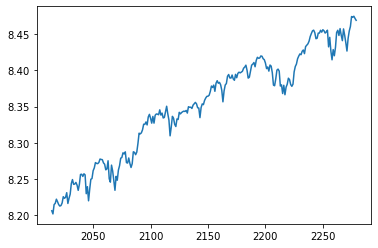

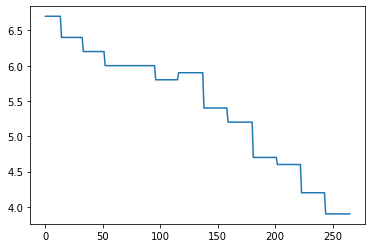

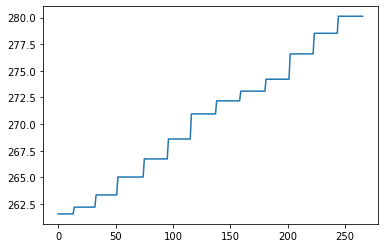

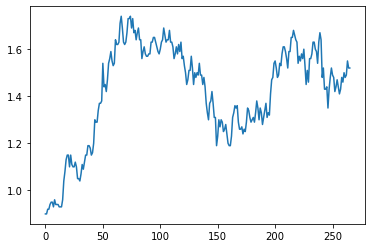

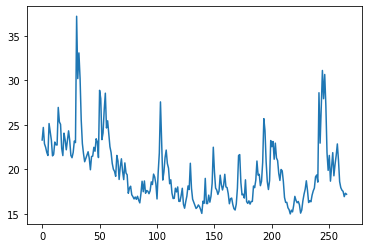

In [6]:
plt.plot(sp500_close)
plt.show()

plt.plot(unemp)
plt.show()

plt.plot(cpi)
plt.show()

plt.plot(ten_year_rate)
plt.show()

plt.plot(vix)
plt.show()

[0.00092334]


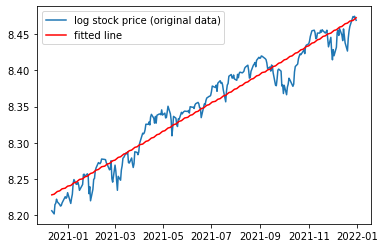

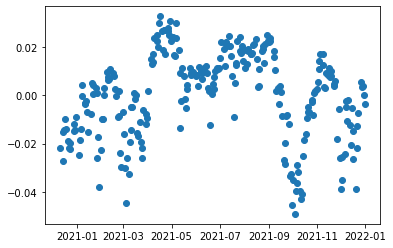

In [7]:
from sklearn import linear_model
clf_sp500 = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_sp500.fit(index, sp500_close)
print(clf_sp500.coef_) # To print the coefficient estimate of the series. 
linear_prediction_sp500 = clf_sp500.predict(index)
plt.plot(sp500['DateTime'], sp500_close, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_sp500, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_sp500 = sp500_close - linear_prediction_sp500

plt.plot(sp500['DateTime'], linear_residuals_sp500, 'o')
plt.show();



[-0.01052399]


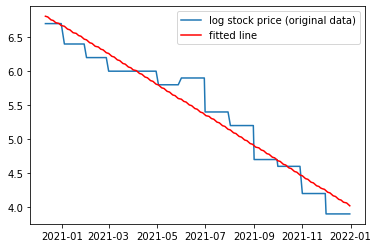

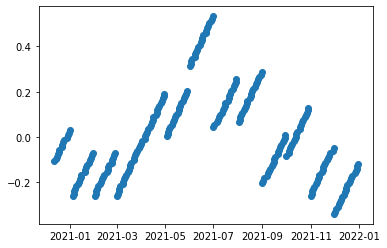

In [8]:
clf_unemp = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_unemp.fit(index, unemp)
print(clf_unemp.coef_) # To print the coefficient estimate of the series. 
linear_prediction_unemp = clf_unemp.predict(index)
plt.plot(sp500['DateTime'], unemp, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_unemp, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_unemp = unemp - linear_prediction_unemp
plt.plot(sp500['DateTime'], linear_residuals_unemp, 'o')
plt.show();

[0.07585321]


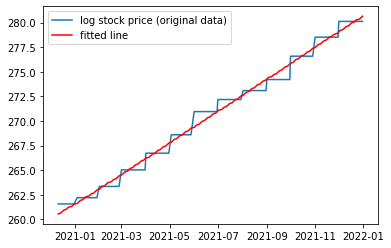

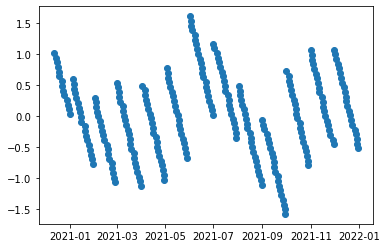

In [9]:
clf_cpi = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_cpi.fit(index, cpi)
print(clf_cpi.coef_) # To print the coefficient estimate of the series. 
linear_prediction_cpi = clf_cpi.predict(index)
plt.plot(sp500['DateTime'], cpi, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_cpi, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_cpi = cpi - linear_prediction_cpi
plt.plot(sp500['DateTime'], linear_residuals_cpi, 'o')
plt.show();

[-0.01729354]


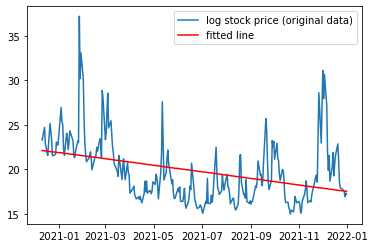

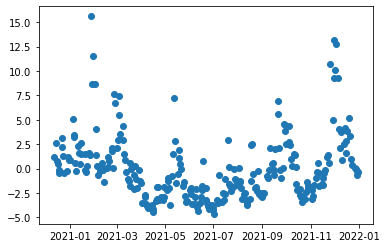

In [10]:
clf_vix = linear_model.LinearRegression()
index = dates.reset_index().index.values.reshape(-1,1)

clf_vix.fit(index, vix)
print(clf_vix.coef_) # To print the coefficient estimate of the series. 
linear_prediction_vix = clf_vix.predict(index)
plt.plot(sp500['DateTime'], vix, label='log stock price (original data)')
plt.plot(sp500['DateTime'], linear_prediction_vix, 'r', label='fitted line')
plt.legend()
plt.show()
linear_residuals_vix = vix - linear_prediction_vix
plt.plot(sp500['DateTime'], linear_residuals_vix, 'o')
plt.show();

1.4954368932038837 0.9


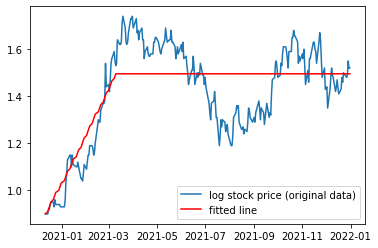

(266,)


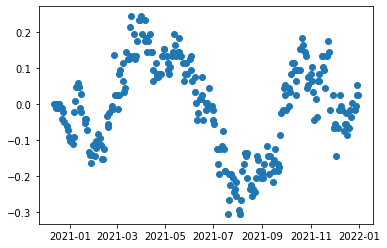

In [11]:
line_length_for_ten_year = 60
ten_year_mean = np.mean(ten_year_rate.iloc[line_length_for_ten_year:].to_numpy(dtype = float))
ten_year_start = float(ten_year_rate.iloc[0])
print(ten_year_mean,ten_year_start)
prediction_ten_year = np.zeros(len(index))
prediction_ten_year[0:line_length_for_ten_year] = ten_year_start+\
                                            (ten_year_mean-ten_year_start)/line_length_for_ten_year*\
                                            np.linspace(0,line_length_for_ten_year,line_length_for_ten_year)
prediction_ten_year[line_length_for_ten_year:] = ten_year_mean

plt.plot(sp500['DateTime'], ten_year_rate , label='log stock price (original data)')
plt.plot(sp500['DateTime'], prediction_ten_year, 'r', label='fitted line')
plt.legend()
plt.show()
residuals_ten_year = ten_year_rate - prediction_ten_year
print(residuals_ten_year.shape)

plt.plot(sp500['DateTime'], residuals_ten_year, 'o')
plt.show();

Create vector dataframe

In [12]:
linear_residuals_sp500.reset_index(drop=True, inplace = True)


varma_data = pd.concat([linear_residuals_sp500,
                        linear_residuals_unemp,
                        linear_residuals_cpi,
                        linear_residuals_vix,
                        residuals_ten_year],axis=1)
varma_data.rename(columns={'Adj Close': 'sp500', 'UNRATE': 'unemp',\
                           'CPIAUCSL': 'cpi',  'CLOSE': 'vix'}, inplace=True)

print(varma_data.head())

      sp500     unemp       cpi       vix  ten_year
0 -0.021974 -0.108338  1.014103  1.188531  0.000000
1 -0.027266 -0.097814  0.938250  2.615824 -0.010092
2 -0.015351 -0.087290  0.862397  0.803118 -0.000184
3 -0.014503 -0.076766  0.786544  0.430411 -0.010276
4 -0.009685 -0.066242  0.710690 -0.122295 -0.000369


In [13]:
from statsmodels.tsa.api import VAR
varma_array = np.asarray(varma_data,dtype = float)
varma_model = VAR(varma_array[0:-days_to_predict])


In [14]:
order = 1
results = varma_model.fit(order)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Dec, 2022
Time:                     14:29:17
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -23.7392
Nobs:                     245.000    HQIC:                  -23.9953
Log likelihood:           1252.37    FPE:                3.19169e-11
AIC:                     -24.1679    Det(Omega_mle):     2.82802e-11
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000054         0.000500            0.107           0.915
L1.y1         0.890301         0.042827           20.788           0.000
L1.y2         0.004296         0.003021            1.422           0.155
L1.y3         0.001082

In [15]:
month_forecast = results.forecast(varma_array[-order:],days_to_predict)

In [16]:
train_and_predict = np.concatenate((linear_residuals_sp500.to_numpy()[0:-days_to_predict],month_forecast[:,0]),axis=0)
print(train_and_predict.shape)

(266,)


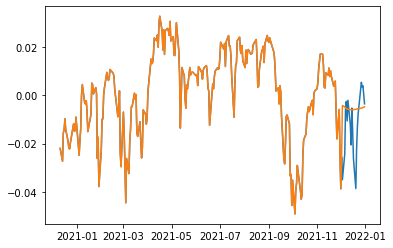

In [17]:
plt.plot(sp500['DateTime'],linear_residuals_sp500)
plt.plot(sp500['DateTime'],train_and_predict)

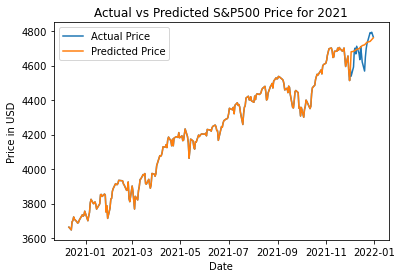

In [18]:
price_predict = np.exp(linear_prediction_sp500+train_and_predict)
plt.plot(sp500['DateTime'],sp500['Adj Close'],label = 'Actual Price')
plt.plot(sp500['DateTime'],price_predict,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [19]:
yhat = np.exp(linear_prediction_sp500[-days_to_predict:]+month_forecast[:,0])
y = sp500['Adj Close'].to_numpy()[-days_to_predict:]

MAPE = 1/days_to_predict*np.sum(np.abs((yhat-y)/y))
RMSE = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat-y)**2))
ET = np.abs(yhat[-1]-y[-1])

print(MAPE)
print(RMSE)
print(ET)

0.010375499068349952
64.2195999494418
5.848201674427401


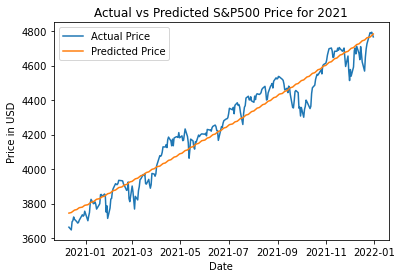

In [20]:
trivial_predict = np.exp(linear_prediction_sp500)
plt.plot(sp500['DateTime'],sp500['Adj Close'],label = 'Actual Price')
plt.plot(sp500['DateTime'],trivial_predict,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.show()

In [21]:
yhat_trivial = np.exp(linear_prediction_sp500[-days_to_predict:])


MAPE_triv = 1/days_to_predict*np.sum(np.abs((yhat_trivial-y)/y))
RMSE_triv = np.sqrt(1/days_to_predict*np.sum(np.linalg.norm(yhat_trivial-y)**2))
ET_triv = np.abs(yhat_trivial[-1]-y[-1])

print(MAPE_triv)
print(RMSE_triv)
print(ET_triv)

0.012890579355767718
78.85301532258417
16.81713544792092


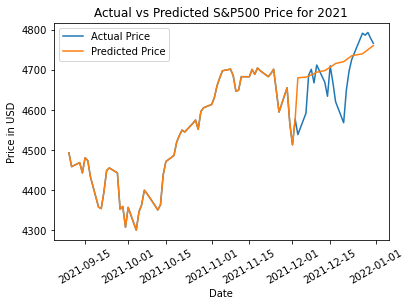

In [23]:
actual_for_report = sp500['Adj Close'].iloc [-(days_to_predict+60):]
predict_for_report = price_predict[-(days_to_predict+60):]
date_time_report = sp500['DateTime'].iloc[-(days_to_predict+60):]

plt.plot(date_time_report,actual_for_report,label = 'Actual Price')
plt.plot(date_time_report,predict_for_report,label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted S&P500 Price for 2021')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.show()